In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print("data set loaded")


data set loaded


In [4]:
X_test.shape


(10000, 32, 32, 3)

In [5]:
X_train.shape


(50000, 32, 32, 3)

In [6]:
import matplotlib.pyplot as plt
def plot_sample(X, index):
    plt.figure(figsize=(3, 3))  
    plt.imshow(X[index])    
    plt.show()

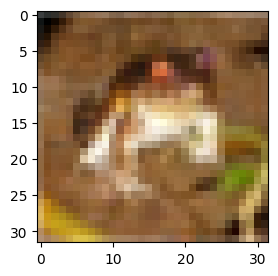

In [7]:
plot_sample(X_train, 0)

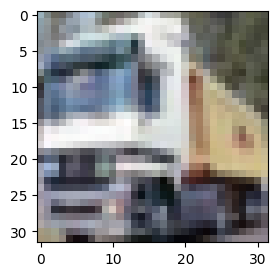

In [8]:
plot_sample(X_train, 1)

In [9]:
y_train.shape


(50000, 1)

In [10]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test=y_test.reshape(-1,)


In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    
    

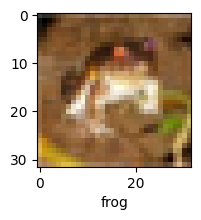

In [15]:
plot_sample(X_train, y_train, 0)


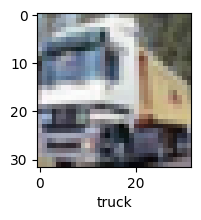

In [16]:
plot_sample(X_train, y_train, 1)


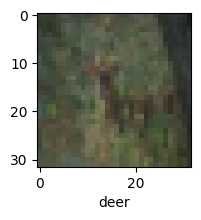

In [17]:
plot_sample(X_train, y_train, 10)


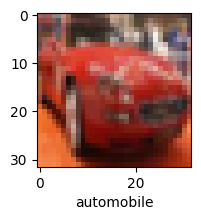

In [18]:
plot_sample(X_train, y_train, 5)

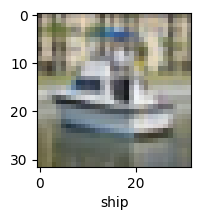

In [19]:
plot_sample(X_train, y_train, 501)

normalizing the data

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0


traning an ann model

In [21]:

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)




Epoch 1/5


1563/1563 [==============================] - 90s 56ms/step - loss: 1.8109 - accuracy: 0.3534
Epoch 2/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.6205 - accuracy: 0.4292
Epoch 3/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.5407 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.4814 - accuracy: 0.4797
Epoch 5/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4307 - accuracy: 0.4959


testing the ann model


In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 [==============================] - 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.64      0.55      1000
           1       0.62      0.58      0.60      1000
           2       0.33      0.44      0.38      1000
           3       0.41      0.23      0.30      1000
           4       0.49      0.26      0.34      1000
           5       0.61      0.19      0.29      1000
           6       0.47      0.66      0.55      1000
           7       0.36      0.78      0.49      1000
           8       0.71      0.47      0.57      1000
           9       0.62      0.48      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4453 - accuracy: 0.4798
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1013 - accuracy: 0.6140
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9629 - accuracy: 0.6655
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8807 - accuracy: 0.6947
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8117 - accuracy: 0.7168
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7514 - accuracy: 0.7403
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7023 - accuracy: 0.7553
Epoch 8/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6574 - accuracy: 0.7691
Epoch 9/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6130 - accuracy: 0.7873
Epoch 10/10
1563/1563 [==============================] - 18s 12m

In [25]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9465 - accuracy: 0.6976


[0.946496307849884, 0.6976000070571899]

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[5.48312637e-05, 1.64519748e-04, 6.99507445e-03, 8.46352041e-01,
        7.29784588e-05, 3.20253428e-03, 1.27361894e-01, 2.81599612e-04,
        1.54987425e-02, 1.57417544e-05],
       [2.19201017e-02, 1.18044727e-01, 6.16047964e-06, 1.53855417e-05,
        7.24254079e-08, 8.78088883e-07, 1.58123851e-06, 5.89817944e-07,
        8.60003889e-01, 6.49389995e-06],
       [2.01330200e-01, 1.02510959e-01, 1.22589013e-03, 7.64500163e-03,
        4.94631764e-04, 1.14791654e-03, 3.84338363e-03, 9.91003355e-04,
        5.28276384e-01, 1.52534664e-01],
       [7.72478580e-01, 1.14116423e-01, 6.62234100e-03, 2.01289397e-04,
        6.32656011e-05, 6.44288184e-06, 8.30322278e-06, 4.50015868e-05,
        1.06458075e-01, 4.41962442e-07],
       [1.03713921e-06, 2.95822101e-05, 1.82298874e-03, 6.75717648e-03,
        1.09272152e-01, 3.25229077e-04, 8.81771505e-01, 1.96046676e-05,
        2.05236006e-07, 5.15000693e-07]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [28]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

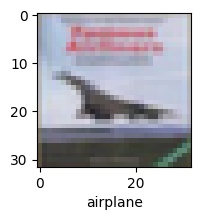

In [29]:
plot_sample(X_test, y_test,3)

In [30]:
classes[y_classes[3]]

'airplane'

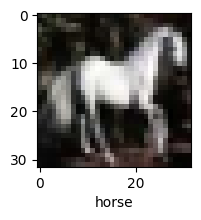

In [31]:
plot_sample(X_test, y_test,13)

In [32]:
classes[y_classes[13]]

'horse'

In [33]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      1000
           1       0.84      0.79      0.81      1000
           2       0.63      0.52      0.57      1000
           3       0.55      0.47      0.51      1000
           4       0.64      0.66      0.65      1000
           5       0.59      0.61      0.60      1000
           6       0.65      0.85      0.73      1000
           7       0.72      0.77      0.74      1000
           8       0.83      0.80      0.81      1000
           9       0.81      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

